## **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

## **Unzip files**

In [1]:
import zipfile

%time
def unzip(zip_file_path, output_dir_path):
    with zipfile.ZipFile(zip_file_path, "r") as zip:
        zip.extractall(output_dir_path)
    print("Data uncompressed successfully...")
    print()

zip_file_path = r"C:\Users\VARSHINA\Downloads\mnist.zip"
output_dir_path = r"D:\Extracted_alphabets_image_files"

unzip(zip_file_path,output_dir_path)

CPU times: total: 0 ns
Wall time: 0 ns
Data uncompressed successfully...



## **Pre Analysis of Given Data**

#### **What are the image file extensions?**

In [22]:
file_extensions = []
for root, dirs, files in os.walk(path):
    print(f"Reading images from {root}, Found {len(files)} files.")
    for file_name in files:
        file_extensions.append(os.path.splitext(file_name)[-1])
        file_path = os.path.join(root, file_name)

print()
print("Total Number of Files:", len(file_extensions))
print("File extensions:", set(file_extensions)) 
path = r"D:\Extracted_alphabets_image_files"

Reading images from D:\Extracted_alphabets_image_files, Found 0 files.
Reading images from D:\Extracted_alphabets_image_files\New folder, Found 0 files.
Reading images from D:\Extracted_alphabets_image_files\New folder\A, Found 13870 files.
Reading images from D:\Extracted_alphabets_image_files\New folder\B, Found 8668 files.
Reading images from D:\Extracted_alphabets_image_files\New folder\C, Found 23409 files.
Reading images from D:\Extracted_alphabets_image_files\New folder\D, Found 10134 files.
Reading images from D:\Extracted_alphabets_image_files\New folder\E, Found 11440 files.
Reading images from D:\Extracted_alphabets_image_files\New folder\F, Found 1163 files.
Reading images from D:\Extracted_alphabets_image_files\New folder\G, Found 5762 files.
Reading images from D:\Extracted_alphabets_image_files\New folder\H, Found 7218 files.
Reading images from D:\Extracted_alphabets_image_files\New folder\I, Found 1120 files.
Reading images from D:\Extracted_alphabets_image_files\New f

### **What are the image sizes, extensions and modes?**


In [23]:
def read_image_files(path):
    images_data = []
    for root, dirs, files in os.walk(path):
        for file_name in files:
            extension = os.path.splitext(file_name)[-1]
            if extension in file_extensions:
                file_path = os.path.join(root, file_name)
                img = Image.open(file_path)
                images_data.append({"file_name": file_name,
                                    "extension": extension, 
                                    "size": img.size, 
                                    "mode": img.mode, 
                                    "dir": root})
    return images_data

def load_into_df(images_data):
    df = pd.DataFrame(images_data)
    return df

In [24]:
%%time

images_data = read_image_files(path)

df = load_into_df(images_data)

df.head()

CPU times: total: 48.7 s
Wall time: 30min 41s


,file_name,extension,size,mode,dir
0,A-0.png,.png,"(28, 28)",L,D:\Extracted_alphabets_image_files\New folder\A
1,A-1.png,.png,"(28, 28)",L,D:\Extracted_alphabets_image_files\New folder\A
2,A-10.png,.png,"(28, 28)",L,D:\Extracted_alphabets_image_files\New folder\A
3,A-100.png,.png,"(28, 28)",L,D:\Extracted_alphabets_image_files\New folder\A
4,A-1000.png,.png,"(28, 28)",L,D:\Extracted_alphabets_image_files\New folder\A


In [25]:
df.shape

(372451, 5)

In [26]:
df['extension'].value_counts() 

extension
.png    372451
Name: count, dtype: int64

In [27]:
df['size'].value_counts()

size
(28, 28)    372451
Name: count, dtype: int64

In [28]:
df['mode'].value_counts() 

mode
L    372451
Name: count, dtype: int64

## **Observations**

1.There are 372451 images in total.

2.All these images are having **.png** format.

3.All these images are of same size i.e. **(28, 28)** and same mode i.e. **Gray Scale**

## **Writing data to csv**

In [22]:
def read_image_files(path):
    images_data = []
    first_dir_skipped = False
    label_count = {}

    for root, dirs, files in os.walk(path):
        if not first_dir_skipped:
            first_dir_skipped = True
            continue

        dir_name = os.path.basename(root)
        dir_last_char = dir_name[-1]

        if dir_last_char not in label_count:
            label_count[dir_last_char] = 0

        files = [f for f in files if os.path.splitext(f)[-1].lower() in ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']]
        for file_name in tqdm(files, desc=f'Processing {dir_name}', leave=False):
            file_path = os.path.join(root, file_name)
            img = Image.open(file_path).convert('L')  # Convert image to grayscale
            img = img.resize((8, 8))  # Resize image to 8x8 pixels
            img_array = list(img.getdata())  # Get pixel data

            # Create a dictionary with pixel data and label
            img_data = {f'pixel{i}': img_array[i] for i in range(64)}
            img_data['label'] = dir_last_char

            images_data.append(img_data)
            label_count[dir_last_char] += 1
    return images_data

def load_into_df(images_data):
    df = pd.DataFrame(images_data)
    return df

In [23]:
path = r"D:\Extracted_alphabets_image_files"
images_data = read_image_files(path)

image_df = load_into_df(images_data)

# Writing df to csv file
image_df.to_csv('image_alphabets.csv', index = False)

image_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,A
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,A
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


## **Step 1 - Load the Dataset**

In [ ]:
df = pd.read_csv('output.csv') 
df.head()

## **Step 2 - Exploratory Data Analysis**

In [3]:
image_df.shape 

(372451, 65)

In [4]:
image_df['label'].nunique() 

26

In [5]:
image_df['label'].value_counts(normalize = True)

label
O    0.155255
S    0.130001
U    0.077884
C    0.062851
T    0.060397
P    0.051929
N    0.051040
A    0.037240
M    0.033121
L    0.031107
R    0.031054
E    0.030715
Y    0.029156
W    0.028954
D    0.027209
B    0.023273
J    0.022803
H    0.019380
X    0.016840
Z    0.016314
Q    0.015605
G    0.015470
K    0.015044
V    0.011228
F    0.003123
I    0.003007
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

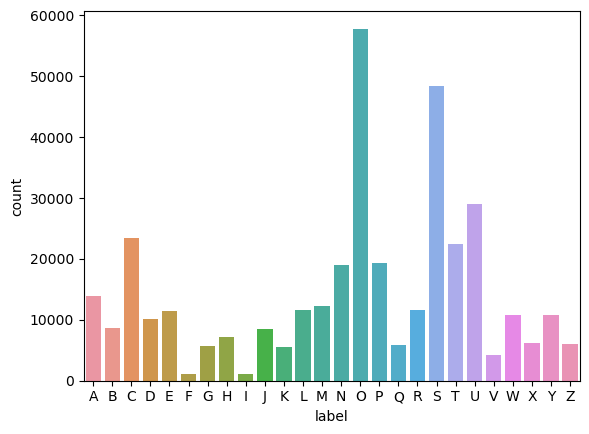

In [6]:
sns.countplot(data=image_df, x='label')

Randomly Generated index: 557
Label of image at 557 index: A

Data Type of Image Array: object
Image Array:
 [[0 0 0 0 1 0 0 0]
 [0 0 0 24 131 39 0 0]
 [0 0 0 97 96 89 0 0]
 [0 0 13 129 34 109 0 0]
 [0 0 60 171 137 127 0 0]
 [0 0 107 63 58 101 0 0]
 [0 0 81 8 63 61 0 0]
 [0 0 0 0 3 0 0 0]]


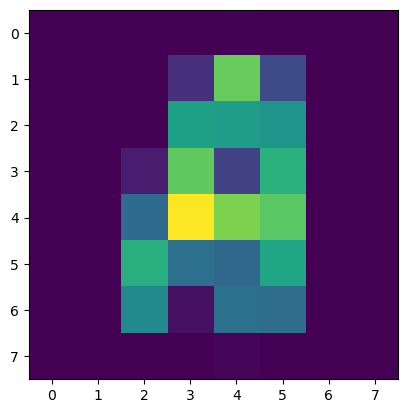

In [7]:
idx = np.random.randint(0, 1796)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (8,8))

print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

[ 64715  67728 127041  78089  86472 135444 286731  59578 162148]


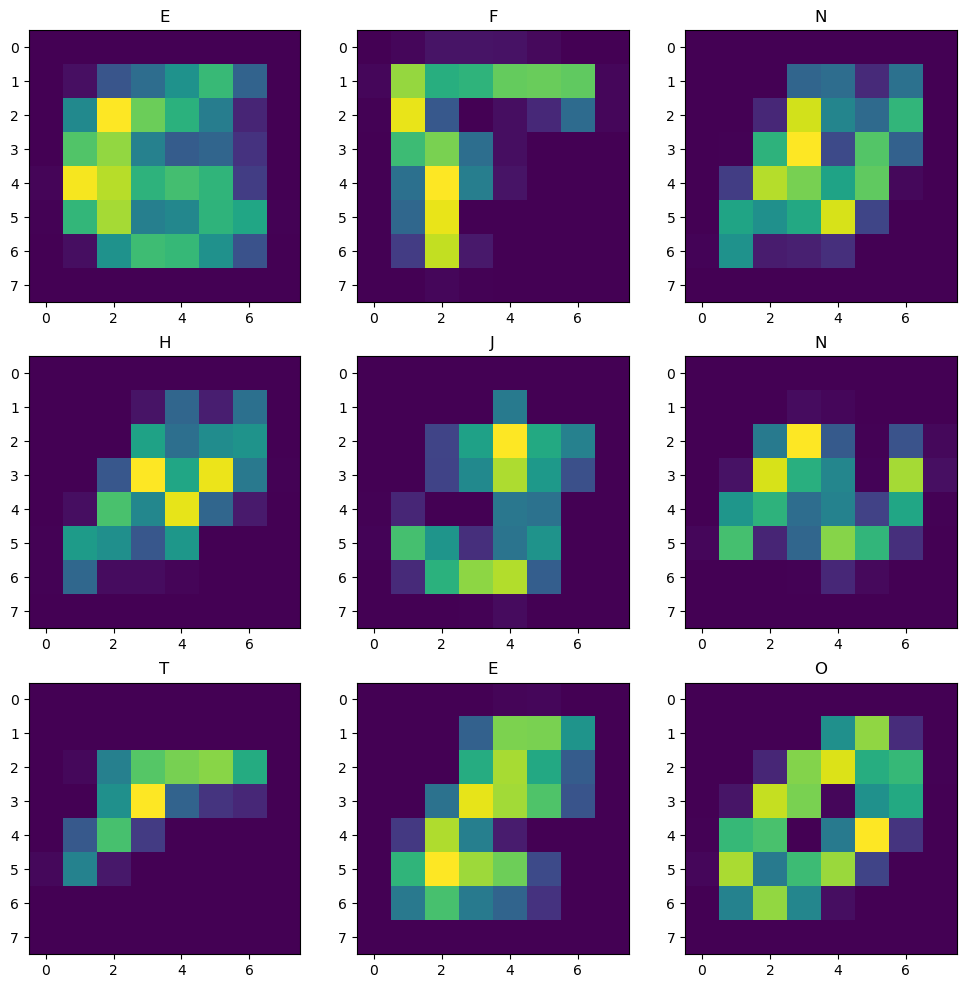

In [8]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, image_df.shape[0], 9)
print(idx)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    label = image_df.iloc[idx[i], -1]
    plt.title(label)
    img_grid = np.reshape(image_df.iloc[idx[i], 0:-1], (8,8))
    img_grid = img_grid.astype("float")
    plt.imshow(img_grid) 

#### **Note : Here we are selecting 50,000 samples from original dataset**

In [9]:
from sklearn.model_selection import train_test_split

strata_column = 'label'

# Perform Stratified Sampling
df_sample, _ = train_test_split(image_df, test_size=(len(image_df) - 50000) / len(image_df), stratify=image_df[strata_column], random_state=42)

# Check the size of the sampled dataset
print("Sampled Dataset Size:", len(df_sample))

Sampled Dataset Size: 50000


## **Step 3 - Segregate Inputs (X) and Output (y)**

In [10]:
X = df_sample.drop(columns = ['label'])
y = df_sample['label']

## **Step 4 - Split the data into Train and Test**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 64) (40000,)
(10000, 64) (10000,)


## **Step 5 and 7 - Apply Data Preparation on Train and Test Data**

In [25]:
# Rescaling numerical features
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = X_train.index)

X_train_transformed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
180518,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.047059,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
126214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
351917,0.0,0.0,0.0,0.0,0.0,0.0,0.011905,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.011236,0.000000,0.0,0.000000,0.000000,0.0,0.0
312220,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.064286,0.0,0.000000,0.000000,0.0,0.0
366004,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.070588,...,0.0,0.0,0.0,0.000000,0.021429,0.0,0.046296,0.014184,0.0,0.0


#### **Note: We won't use here Standardization `(Standard Scaler)`** 

In [15]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_train_transformed = pd.DataFrame(standard_scaler.fit_transform(X_train), 
                                    columns = standard_scaler.get_feature_names_out(), 
                                    index = X_train.index)

X_train_transformed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
180518,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.047059,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
126214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
351917,0.0,0.0,0.0,0.0,0.0,0.0,0.011905,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.011236,0.000000,0.0,0.000000,0.000000,0.0,0.0
312220,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.064286,0.0,0.000000,0.000000,0.0,0.0
366004,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.070588,...,0.0,0.0,0.0,0.000000,0.021429,0.0,0.046296,0.014184,0.0,0.0


In [26]:
X_test_transformed = pd.DataFrame(minmax_scaler.transform(X_test), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = X_test.index)

X_test_transformed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
329406,0.0,0.0,0.0,0.0,0.000000,0.043478,0.011905,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.007143,0.000000,0.0,0.0,0.0,0.0
125157,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.037383,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
342562,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.041176,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
279503,0.0,0.0,0.0,0.0,0.142857,0.000000,0.000000,0.0,0.0,0.000000,...,0.149533,0.0,0.0,0.0,0.028571,0.010204,0.0,0.0,0.0,0.0
300674,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.070588,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


## **Step 6,8,9 - Training and Testing Phase**

### **a. Naive Bayes**

In [27]:
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Building the Model
classifier = MultinomialNB() 
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Naive Bayes
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

NB_prediction_time = time.time() - start_time

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Naive Bayes Model Prediction Time: {NB_prediction_time:.2f} seconds")

CPU times: total: 93.8 ms
Wall time: 115 ms

Model's Accuracy: 0.6517
Naive Bayes Model Prediction Time: 0.01 seconds


### **b. Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression

# Building the Model
classifier = LogisticRegression()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Logistic Regression
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

LR_prediction_time = time.time() - start_time

# Model Evaluation
print()
print(f"Model's Accuracy :{metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Logistic Regression Model prediction Time: {LR_prediction_time:.2f} seconds")

CPU times: total: 5.42 s
Wall time: 2.48 s

Model's Accuracy :0.852
Logistic Regression Model prediction Time: 0.00 seconds


C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **c. Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Building the Model
classifier = DecisionTreeClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Decision Tree
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

DT_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Decision Tree Model Prediction Time: {DT_prediction_time:.2f} seconds")

CPU times: total: 781 ms
Wall time: 1.79 s

Model's Accuracy : 0.8145
Decision Tree Model Prediction Time: 0.01 seconds


### **d. K Nearest Neighbor**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Building the Model
classifier = KNeighborsClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for K Nearest Neighbor
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

KNN_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"K Nearest Neighbor Model Prediction Time: {KNN_prediction_time:.2f} seconds")

CPU times: total: 31.2 ms
Wall time: 57.1 ms

Model's Accuracy : 0.9368
K Nearest Neighbor Model Prediction Time: 1.09 seconds


### **e. Random Forest**

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Building the Model
classifier = RandomForestClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Random Forest 
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

RF_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random Forest Model Prediction Time: {RF_prediction_time:.2f} seconds")

CPU times: total: 7.41 s
Wall time: 16.3 s

Model's Accuracy : 0.9316
Random Forest Model Prediction Time: 0.34 seconds


### **Visualizing Prediction Times for Different Classification Models**

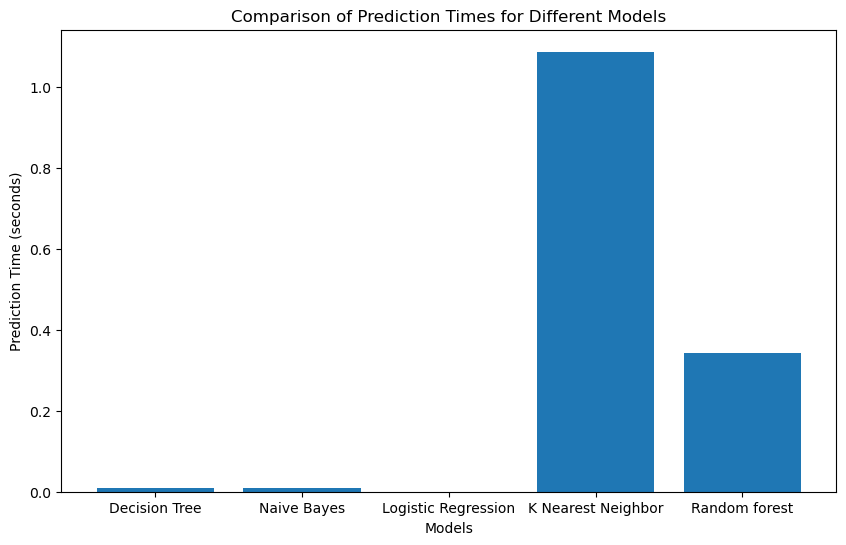

In [33]:
# Model names
model_names = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'K Nearest Neighbor', 'Random forest']

# Prediction times
prediction_times = [DT_prediction_time, NB_prediction_time, LR_prediction_time, KNN_prediction_time, RF_prediction_time]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, prediction_times)
plt.xlabel('Models')
plt.ylabel('Prediction Time (seconds)')
plt.title('Comparison of Prediction Times for Different Models')
plt.show() 